# City of Chicago Uber/Lyft Vehicles Case Study

- 🏆 80 points available
- 🤠 Author: Park (ypark32@illinois.edu)
    - Instructor of Accountancy at the University of Illinois at Urbana-Champaign 
- ✏️ Last updated on 3/20/2021

There have been four Transportation Network Providers (often called rideshare companies 🚗) licensed to operate in Chicago. These rideshare companies are required to routinely report vehicles, drivers, and trips information to the City of Chicago, which are published to the [Chicago Data Portal](https://data.cityofchicago.org/). The latest vehicles dataset can be downloaded at [registered vehicles dataset](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Vehicles/bc6b-sq4u).

The reporting is done on a monthly basis, as indicated in the `REPORTED_YEAR` and `REPORTED_MONTH` columns. For each registered vehicle at a given month, the following information are provided:

| Column Name       | Description                                                                                                                                                                                                                      |
|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `REPORTD_YEAR`    | The year in which the vehicle was reported                                                                                                                                                                                       |
| `REPORTED_MONTH`  | The month in which the vehicle was reported                                                                                                                                                                                      |
| `STATE`           | The state of the license plate                                                                                                                                                                                                   |
| `MAKE`            | The make of the vehicle                                                                                                                                                                                                          |
| `MODEL`           | The model of the vehicle                                                                                                                                                                                                         |
| `COLOR`           | The color of the vehicle                                                                                                                                                                                                         |
| `MODEL_YEAR`      | The model year of the vehicle                                                                                                                                                                                                    |
| `NUMBER_OF_TRIPS` | Number of trips provided in this month. Due to the complexities of matching, errors are possible in both directions. Values over 999 are converted to null as suspected error values that interfere with easy data visualization |
| `MULTIPLE_TNPS`   | Whether the vehicle was reported by multiple TNPs in this month. Matching is imperfect so some vehicle records that should have been combined may be separate.                                                                   |

In this case study, you'll use Pandas to explore and analyze over 1 million monthly rideshare vehicle registrations. Below are some of the questions you'll be answering.

- How many total trips did drivers make between 2015-2020?
- How many trips did drivers make per month on average between 2015-2020?
- Do Lincoln drivers make more trips compared to the overall average?
- Do any drivers drive a red Tesla?
- Do any drivers drive a Porsche or a Hummer?
- Are there any vehicles that are brand new?
- Do drivers who drive for two or more rideshare companies (e.g., Uber **and** Lyft) make more trips on average compared to other drivers who only drive for only one rideshare company?
- Which automakers are popular amongst rideshare drivers?
- Which automakers have the highest number of trips on average?
- How many number of trips do drivers of Japanese big three automakers make on average?
- Which make/model are popular amongst rideshare drivers?
- How about color?

### Notes

- Vehicle registrations that made less than 100 monthly trips are excluded. If you'd like to use the full dataset, you can download the full data (~350 MB) at [registered vehicles dataset](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Vehicles/bc6b-sq4u).  
- A vehicle will likely be registered multiple times. As an example, if a driver drives a Camry for 12 months, there will be 12 rows of duplicate vehicle information.

▶️ Run the code cell below to import `unittest`, a package used in **🧭 Check Your Work** sections and by the autograder.

In [ ]:
import unittest

tc = unittest.TestCase()

---

## 🔭 Part 1 - Explore Data

---

### 🎯 Deliverable 1: Import `numpy` and `pandas`

#### 👇 Tasks

- ✔️ Import the following Python packages.
    1. `pandas`: Use alias `pd`.
    2. `numpy`: Use alias `np`.

In [ ]:
# YOUR CODE BEGINS
import pandas as pd
import numpy as np
# YOUR CODE ENDS

#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertTrue('pd' in globals(), 'Check whether you have correctly import Pandas with an alias.')
tc.assertTrue('np' in globals(), 'Check whether you have correctly import NumPy with an alias.')

---

### 📌 Load data

▶️ Run the code cell below to configure Pandas, create a new `DataFrame` named `df_v` from a ZIP file, and clone the dataset for intermediate checks.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
# Display precision of decimal places to 1
# Precision of decimal places do not have a significance in this case study
pd.set_option('precision', 1)

# DO NOT CHANGE THE CODE IN THIS CELL
df_v = pd.read_csv('../input/chicago-uberlyft-vehicles/chicago-ridesharing-vehicles.csv')

# Used to keep a clean copy
df_v_backup = df_v.copy()

# Display the first 5 rows
df_v.head()

---

### 🎯 Deliverable 2: Find the number of rows and columns in the dataset

#### 👇 Tasks

- ✔️ Store the number of rows in `df_v` to a new variable named `num_rows`.
- ✔️ Store the number of columns in `df_v` to a new variable named `num_cols`.
- ✔️ Both `num_rows` and `num_cols` must be `int`s.
- ✔️ Use `.shape`, not `len()`.

In [ ]:
# YOUR CODE BEGINS
num_rows = df_v.shape[0]
num_cols = df_v.shape[1]
# YOUR CODE ENDS

print(f'There are {num_rows} rows and {num_cols} columns in the dataset.')
print('🐼 With over a million rows, this dataset is by far the largest one we\'ve worked with so far!!')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertEqual(num_rows, len(df_v_backup.index), f'Number of rows should be {len(df_v_backup.index)}')
tc.assertEqual(num_cols, len(df_v_backup.columns), f'Number of columns should be {len(df_v_backup.columns)}')

---

### 🎯 Deliverable 3: Concise summary of the dataset

#### 👇 Tasks

- ✔️ Use the `info()` method to print out a concise summary of `df_v`.

#### 🚀 Hints

- `my_dataframe.info()` prints out a concise summary of `my_dataframe`.

In [ ]:
# YOUR CODE BEGINS
df_v.info()
# YOUR CODE ENDS

---

### 🎯 Deliverable 4: Total number of trips

#### 👇 Tasks

- ✔️ Calculate the total number of trips (monthly) made by all registered vehicles in `df_v`.
- ✔️ Store the result to a new variable named `total_num_trips`.
- ✔️ `total_num_trips` should be an `int` type (e.g., `int`, `np.int64`).

#### 🚀 Hints

- Sum all values in the `NUMBER_OF_TRIPS` column.
- `my_series.sum()` returns the sum of all values in `my_series`.
- Every column in a Pandas `DataFrame` is a `Series`.

In [ ]:
# YOUR CODE BEGINS
total_num_trips = df_v['NUMBER_OF_TRIPS'].sum()
# YOUR CODE ENDS

print(f'{total_num_trips} trips were made in total.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertEqual(total_num_trips, np.sum(df_v_backup['_'.join(['nUmbEr', 'oF', 'TrIpS']).upper()]))

---

### 🎯 Deliverable 5: Average number of trips (monthly)

#### 👇 Tasks

- ✔️ Calculate the average number of trips (monthly) made by all registered vehicles in `df_v`.
- ✔️ Store the result to a new variable named `avg_num_trips`.
- ✔️ `avg_num_trips` should be a `float` type (e.g., `float`, `np.float64`).

#### 🚀 Hints

- Find the mean of all values in the `NUMBER_OF_TRIPS` column.
- `my_series.mean()` returns the mean of all values in `my_series`.

In [ ]:
# YOUR CODE BEGINS
avg_num_trips = df_v['NUMBER_OF_TRIPS'].mean()
# YOUR CODE ENDS

print(f'On average, a vehicle made {round(avg_num_trips, 1)} trips each month.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertAlmostEqual(avg_num_trips, np.mean(df_v_backup['_'.join(['nUmbEr', 'oF', 'TrIpS']).upper()]))

---

### 🎯 Deliverable 6: Filter Lincoln vehicles

#### 👇 Tasks

- ✔️ Using `df_v`, filter rows where the vehicle's `MAKE` is `Lincoln`.
    - Store the result to a new variable named `df_lincoln`.
- ✔️ `df_v` should remain unaltered after your code.

In [ ]:
# YOUR CODE BEGINS
df_lincoln = df_v[df_v['MAKE'] == 'Lincoln']
# YOUR CODE ENDS

display(df_lincoln.head(5))
print(f'There are {df_lincoln.shape[0]} monthly Lincoln vehicle registrations.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertEqual(df_v.shape, df_v_backup.shape, 'df_v should remain unaltered.')

pd.testing.assert_frame_equal(df_lincoln
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True),
                              df_v_backup.query(f'{"".join(["ma", "ke"]).upper()} == "{"lIncOlN".capitalize()}"')
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True),
                              check_like=True)

---

### 🎯 Deliverable 7: Average number of trips (monthly) of Lincoln vehicles

#### 👇 Tasks

- ✔️ Using `df_lincoln`, calculate the average number of trips (monthly) of all Lincoln vehicles.
- ✔️ Store the result to a new variable named `avg_num_trips_lincoln`.
- ✔️ `avg_num_trips_lincoln` should be a `float` type (e.g., `float`, `np.float64`).

#### 🚀 Hints

- Find the mean of all
values in `df_lincoln`'s `NUMBER_OF_TRIPS` column.
- `my_series.mean()` returns the mean of all values in `my_series`.

In [ ]:
# YOUR CODE BEGINS
avg_num_trips_lincoln = df_lincoln['NUMBER_OF_TRIPS'].mean()
# YOUR CODE ENDS

print(f'Lincoln drivers made {round(avg_num_trips_lincoln, 1)} trips (monthly) on average.')
print(f'This is higher than the overall average of {round(avg_num_trips, 1)} trips (monthly).')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertAlmostEqual(avg_num_trips_lincoln, df_v_backup.query(f'{"".join(["mA", "Ke"]).upper()} == "{"LiNCoLN".capitalize()}"') \
    ["_".join(['NuMBeR', 'oF', 'tRiPs']).upper()].mean())

---

### 🎯 Deliverable 8: Red Tesla Vehicles

#### 👇 Tasks

- ✔️ Using `df_v`, filter rows where:
    - `MAKE` is `Tesla`, **AND**
    - `COLOR` is `Red`.
- ✔️ Store the result to a new variable named `df_red_tesla`.
- ✔️ `df_v` should remain unaltered after your code.

#### 🚀 Hints

Use the logical AND operator (`&`) with parentheses to check whether two conditions are both satisfied. Refer to the example code below.

![logical and](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-filter-using-logical-and-01.png?raw=true)

In [ ]:
# YOUR CODE BEGINS
df_red_tesla = df_v[(df_v['MAKE'] == 'Tesla') & (df_v['COLOR'] == 'Red')]
# YOUR CODE ENDS

df_red_tesla.head(5)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertEqual(df_v.shape, df_v_backup.shape, 'df_v should remain unaltered.')

pd.testing.assert_frame_equal(df_v_backup
                                  .query(f'{"".join(["mA", "kE"]).upper()} == "{"".join(["T", "e", "s", "l", "a"])}" \
                                          & {"".join(["c", "OLO", "r"]).upper()} == "{("r" + "E" + "D").capitalize()}"')
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True),
                              df_red_tesla
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 9: Porsche + Hummer

#### 👇 Tasks

- ✔️ Using `df_v`, filter rows where:
    - `MAKE` is `Porsche`, **OR**
    - `MAKE` is `Hummer`.
- ✔️ Store the result to a new variable named `df_porsche_hummer`.
- ✔️ `df_v` should remain unaltered after your code.

#### 🚀 Hints

Use the logical OR operator (`|`) with parentheses to check whether eithe conditions are both satisfied. Refer to the code example below.

![logical OR](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-filter-using-logical-or-01.png?raw=true)

In [ ]:
# YOUR CODE BEGINS
df_porsche_hummer = df_v[(df_v['MAKE'] == 'Porsche') | (df_v['MAKE'] == 'Hummer')]
# YOUR CODE ENDS

display(df_porsche_hummer.head(5))
print(f'There are {df_porsche_hummer.shape[0]} Porsche and Hummer vehicles.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertEqual(df_v.shape, df_v_backup.shape, 'df_v should remain unaltered.')

pd.testing.assert_frame_equal(df_v_backup
                                  .query(f'{"mAKe".upper()} == "{"PORsCHE".capitalize()}" \
                                      | {"mAke".upper()} == "{"HuMMeR".capitalize()}"')
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True),
                              df_porsche_hummer
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 10: Black Lincoln Mkzs with 999+ trips

#### 👇 Tasks

- ✔️ Using `df_v`, filter rows where:
    - `MODEL` is `Mkz`, **AND**
    - `COLOR` is `Black`, **AND**
    - `NUMBER_OF_TRIPS` is greater than or equal to `999`.
- ✔️ Store the result to a new variable named `df_black_mkz`.
- ✔️ `df_v` should remain unaltered after your code.

#### 🚀 Hints

- Use the logical AND operator (`&`) with parentheses to check whether two or more conditions are satisfied.
- **Example**: `df_filtered = df[(condition1) & (condition2) & (condition3)]`

In [ ]:
# YOUR CODE BEGINS
df_black_mkz = df_v[(df_v['MODEL'] == 'Mkz') & (df_v['COLOR'] == 'Black') & (df_v['NUMBER_OF_TRIPS'] >= 999)]
# YOUR CODE ENDS

display(df_black_mkz)
print(f'There are {df_black_mkz.shape[0]} black Mkzs that have made 999+ trips in a given month.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertEqual(df_v.shape, df_v_backup.shape, 'df_v should remain unaltered.')

pd.testing.assert_frame_equal(df_v_backup
                                  .query(f'{"mOdEL".upper()} == "{"mKz".capitalize()}" \
                                      & {"cOlOr".upper()} == "{"bLaCK".capitalize()}" \
                                      & {"_".join(["nUMBEr", "OF", "TripS"]).upper()} > (100 * 10 - 2)')
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True),
                              df_black_mkz
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 11: Latest model year vehicles

#### 👇 Tasks

- ✔️ Using `df_v`, filter rows where the vehicle's `MODEL_YEAR` (NOT `REPORTED_YEAR`) is 2021 or newer.
- ✔️ Store the result to a new variable named `df_latest_models`.
- ✔️ `df_v` should remain unaltered after your code.

In [ ]:
# YOUR CODE BEGINS
df_latest_models = df_v[df_v['MODEL_YEAR'] >= 2021]
# YOUR CODE ENDS

display(df_latest_models)
print(f'There are {df_latest_models.shape[0]} latest model registrations.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertEqual(df_v.shape, df_v_backup.shape, 'df_v should remain unaltered.')

pd.testing.assert_frame_equal(df_v_backup
                                  .query(f'{"_".join(["MoDeL", "YeaR"]).upper()} > (1010 * 2)')
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True),
                              df_latest_models
                                  .sort_values(df_v_backup.columns.tolist())
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 12: Compare average number of trips by `MULTIPLE_TNPS`

A driver can choose to drive for only one ridesharing service (e.g., only for Uber) or choose to drive for two or more services (e.g., for both Uber **and** Lyft).

`MULTIPLE_TNPS` column indicates whether a driver is registered for multiple rideshare services. The `MULTIPLE_TNPS` value of a registered vehicle will be:
- `False` if the driver is only registered for one service (e.g., only for Uber)
- `True` if the driver is registered for two or more services (e.g., Uber **and** Lyft)

**Question**: Do drivers make more trips on average if they are registered in multiple rideshare services?

Your goal is to answer that question using data. 📐

#### 👇 Tasks

- ✔️ Using `df_v`, calculate the following two metrics:
    1. Average number of trips by vehicles where `MULTIPLE_TNPS` is `False`.
        - ✏️ Store this to a new variable named `avg_num_trips_single_tnps`.
        - `avg_num_trips_single_tnps` should be a `float`-typed variable.
    2. Average number of trips by vehicles where `MULTIPLE_TNPS` is `True`.
        - ✏️ Store this to a new variable named `avg_num_trips_multiple_tnps`.
        - `avg_num_trips_multiple_tnps` should be a `float`-typed variable.
- ✔️ `df_v` should remain unaltered after your code.

#### 🚀 Hints

- There are many ways to do this. The process described below is only one of them.
- Create the following two `DataFrame`s using filter.
    1. `df_single_tnps`: Only contains rows where `MULTIPLE_TNPS` is `False`.
    2. `df_multiple_tnps`: Only contains rows where `MULTIPLE_TNPS` is `True`.
- For each of the two `DataFrame`s you've created, calculate the average of `NUMBER_OF_TRIPS`.
    - **Example**: `df_single_tnps['NUMBER_OF_TRIPS'].mean()`

In [ ]:
# YOUR CODE BEGINS
df_single_tnps = df_v[~df_v['MULTIPLE_TNPS']]
df_multiple_tnps = df_v[df_v['MULTIPLE_TNPS']]

avg_num_trips_single_tnps = df_single_tnps['NUMBER_OF_TRIPS'].mean()
avg_num_trips_multiple_tnps = df_multiple_tnps['NUMBER_OF_TRIPS'].mean()
# YOUR CODE ENDS

print(f'Drivers driving for a single rideshare service made {round(avg_num_trips_single_tnps, 1)} trips (monthly) on average.')
print(f'Drivers driving for multiple rideshare services made {round(avg_num_trips_multiple_tnps, 1)} trips (monthly) on average.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
tc.assertEqual(df_v.shape, df_v_backup.shape, 'df_v should remain unaltered.')

col_check = '_'.join(['MulTiPle', ''.join(['T', 'n', 'P', 's'])]).upper()
col_metric = '_'.join([''.join(['NuM', 'beR']), 'oF', ''.join(['T', 'r', 'I', 'P', 's'])]).upper()

tc.assertAlmostEqual(avg_num_trips_single_tnps, np.mean(df_v.query(f'~{col_check}')[col_metric]))
tc.assertAlmostEqual(avg_num_trips_multiple_tnps, np.mean(df_v.query(f'{col_check}')[col_metric]))

---

## 🔮 Part 2 - Make/Model/Color Analysis

So far, we've looked at *individual* vehicle registrations. In this section, we will *aggregate* vehicles by different criteria. Since you may not be familiar with the `groupby()` method, we will give you the full code for some deliverables.

---

### 🎯 Deliverable 13: Create a Summary of Metrics by Vehicle Manufacturer

Our first *level of aggregation* is the vehicle manufacturer (`MAKE`). For each vehicle manufacturer, you'll be calculating the total number of registered vehicles (`NUM_REG`, total number of trips (`TOTAL_NUM_TRIPS`), and the average number of trips (`AVG_NUM_TRIPS`).

**We will provide you the code for this deliverable.**

![Groupby make](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-groupby-make-01.png?raw=true)

#### 👇 Tasks

- ✔️ Copy the code in the image above to the code cell below.
    - 😺 *Try* to understand what the code does.
- ✔️ `df_v` should remain unaltered after your code.

In [ ]:
# YOUR CODE BEGINS
# Group by vehicle manufacturer
df_by_make = df_v.groupby('MAKE', as_index=False).agg({
    'NUMBER_OF_TRIPS': ['count', 'sum', 'mean']
})

# Rename columns
df_by_make.columns = ['MAKE', 'NUM_REG', 'TOTAL_NUM_TRIPS', 'AVG_NUM_TRIPS']

# Display first 6 rows
df_by_make.head(6)
# YOUR CODE ENDS

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(''.join(['m', 'ak', 'e']).upper()) \
    .agg({'number_of_trips'.upper(): [''.join(['c', 'ou', 'n', 't']), np.sum, np.mean]}) \
    .reset_index()
df_check.columns = ['AVG_NUM_TRIPS', 'TOTAL_NUM_TRIPS', 'NUM_REG', 'MAKE'][::-1]

tc.assertEqual(df_v.shape, df_v_backup.shape, 'df_v should remain unaltered.')

pd.testing.assert_frame_equal(df_check
                                  .sort_values(df_check.columns.tolist())
                                  .reset_index(drop=True),
                              df_by_make
                                  .sort_values(df_by_make.columns.tolist())
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 14: Sort by number of registered vehicles

Can you sort `df_by_make` by popularity?

#### 👇 Tasks

- ✔️ Sort `df_by_make` by `NUM_REG` in **descending** order.
- ✔️ Store the sorted result to a new variable named `df_by_make_popularity`.
- ✔️ `df_by_make` should remain unaltered after your code.
    - In other words, your code should store the sorted result to `df_by_make_popularity` **without affecting `df_by_make`**.

#### 🚀 Hints

To sort `my_dataframe` by `some_column` in descending order **and** store the sorted result to a new variable named `sorted_dataframe`, you can use the following code:

![drop inplace](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-sort-df-and-store-result-01.png?raw=true)

In [ ]:
# YOUR CODE BEGINS
df_by_make_popularity = df_by_make.sort_values('NUM_REG', ascending=False)
# YOUR CODE ENDS

df_by_make_popularity.head(10)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby('MAKE') \
    .agg({'number_of_trips'.upper(): [''.join(['c', 'ou', 'n', 't']), np.sum, np.mean]}) \
    .reset_index()
df_check.columns = ['AVG_NUM_TRIPS', 'TOTAL_NUM_TRIPS', 'NUM_REG', 'MAKE'][::-1]
df_check.sort_values('_'.join(['num', 'reg']).upper(), ascending=bool(0), inplace=bool(1))

pd.testing.assert_frame_equal(df_check.reset_index(drop=True),
                              df_by_make_popularity.reset_index(drop=True))

---

### 🎯 Deliverable 15: Sort by average number of trips (monthly)

Can you sort `df_by_make` by the average number of trips (monthly)?

#### 👇 Tasks

- ✔️ Sort `df_by_make` by `AVG_NUM_TRIPS` in **descending** order.
- ✔️ Store the sorted result to a new variable named `df_by_make_trips`.
- ✔️ Drop `NUM_REG` and `TOTAL_NUM_TRIPS` columns from `df_by_make_trips`.
    - After your code runs, `df_by_make_trips` should only have two columns - `MAKE` and `AVG_NUM_TRIPS`.
- ✔️ `df_by_make` should remain unaltered after your code.
    - In other words, your code should (1) store the sorted result to `df_by_make_trips` and (2) drop `NUM_REG` and `TOTAL_NUM_TRIPS` columns **without affecting `df_by_make`**.
- ⚠️ **Warning**: Running your code more than once may throw an error since you cannot drop a column that has already been dropped. Despite the error message, this is not a huge problem as it won't have any effect on your `DataFrame`. The error message will go away if you go back a few steps and restart with a *fresh* `df_by_make`.

#### 🚀 Hints

To drop `some_col1` and `some_col2` from `my_dataframe`, you can use one of the following code (both lines perform the exact same task):

![drop inplace](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-drop-columns-inplace-01.png?raw=true)

![drop inplace](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-drop-columns-inplace-02.png?raw=true)


In [ ]:
# YOUR CODE BEGINS
df_by_make_trips = df_by_make.sort_values('AVG_NUM_TRIPS', ascending=False)
df_by_make_trips.drop(columns=['NUM_REG', 'TOTAL_NUM_TRIPS'], inplace=True)
# YOUR CODE ENDS

df_by_make_trips.head(10)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby('MAKE') \
    .agg({'number_of_trips'.upper(): [''.join(['c', 'ou', 'n', 't']), np.sum, np.mean]}) \
    .reset_index()
df_check.columns = ['AVG_NUM_TRIPS', 'TOTAL_NUM_TRIPS', 'NUM_REG', 'MAKE'][::-1]
df_check = df_check[['maKE'.upper(), '_'.join(['avg', 'num', 'trips']).upper()]]
df_check.sort_values('_'.join(['avg', 'num', 'trips']).upper(), ascending=bool(0), inplace=bool(1))

pd.testing.assert_frame_equal(df_check.reset_index(drop=True),
                              df_by_make_trips.reset_index(drop=True))

---

### 🎯 Deliverable 16: Average number of trips of Japanese Big 3

#### 👇 Tasks

- ✔️ Using `df_by_make_trips`, retrieve the following three values.
    1. `avg_num_trips_toyota`: Average number of trips (monthly) of Toyota vehicles
    2. `avg_num_trips_nissan`: Average number of trips (monthly) of Nissan vehicles
    3. `avg_num_trips_honda`: Average number of trips (monthly) of Honda vehicles
- ✔️ All 3 variables must be `float`-typed.
- ✔️ `df_by_make_trips` should remain unaltered after your code.
- ⚠️ You must perform this task **programmatically**. You cannot manually enter the numbers (e.g., `avg_num_trips_toyota = 264.1` is NOT a correct answer).

#### 🚀 Hints

To retrieve the value of `major1` column of `Clint` from `df_you`, you can use either of the following code below (they both do the exact same thing):

**The code below will...**

1. Filter row(s) where `name` is `Clint`.
2. Retrieve the `major1` column as a Pandas `Series`.
3. Get the value of the first row in the `Series` (`iloc[0]` returns the value of the first row).

![filter and iloc to retrieve cell value](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-use-iloc-after-filter-01.png?raw=true)

![loc and iloc to retrieve cell value](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-use-iloc-after-filter-02.png?raw=true)

In [ ]:
# YOUR CODE BEGINS
avg_num_trips_toyota = df_by_make_trips[df_by_make_trips['MAKE'] == 'Toyota']['AVG_NUM_TRIPS'].iloc[0]
avg_num_trips_nissan = df_by_make_trips[df_by_make_trips['MAKE'] == 'Nissan']['AVG_NUM_TRIPS'].iloc[0]
avg_num_trips_honda = df_by_make_trips[df_by_make_trips['MAKE'] == 'Honda']['AVG_NUM_TRIPS'].iloc[0]
# YOUR CODE ENDS

print(f'Toyota vehicles have an average number of {round(avg_num_trips_toyota, 1)} trips (monthly).')
print(f'Nissan vehicles have an average number of {round(avg_num_trips_nissan, 1)} trips (monthly).')
print(f'Honda vehicles have an average number of {round(avg_num_trips_honda, 1)} trips (monthly).')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby('MAKE') \
    .agg({'number_of_trips'.upper(): [''.join(['c', 'ou', 'n', 't']), np.sum, np.mean]}) \
    .reset_index()
df_check.columns = ['AVG_NUM_TRIPS', 'TOTAL_NUM_TRIPS', 'NUM_REG', 'MAKE'][::-1]

col_check = '_'.join(['avg', 'num', 'trips']).upper()
make_check = list(map(lambda x: x.capitalize(), ['toYOta', 'niSSan', 'hONDa']))
var_check = [avg_num_trips_toyota, avg_num_trips_nissan, avg_num_trips_honda]

for i in range(len(var_check)):
    tc.assertAlmostEqual(var_check[i], df_check.query(f'MAKE == "{make_check[i]}"')[col_check].iloc[0])

---

### 🎯 Deliverable 17: Create a Summary of Metrics by Vehicle Model

Our second *level of aggregation* is the vehicle manufacturer (`MAKE`) **and** model (`MODEL`). For each vehicle model, you'll be calculating the total number of registered vehicles (`NUM_REG`, total number of trips (`TOTAL_NUM_TRIPS`), and the average number of trips (`AVG_NUM_TRIPS`).

**Again, we will provide you the code for this deliverable.**

![Groupby make](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-groupby-make-and-model-01.png?raw=true)

#### 👇 Tasks

- ✔️ Copy the code in the image above to the code cell below.
    - 😺 *Try* to understand what the code does.
- ✔️ `df_v` should remain unaltered after your code.

In [ ]:
# YOUR CODE BEGINS
# Group by MAKE & MODEL and calculate stats
df_by_model = df_v.groupby(['MAKE', 'MODEL'], as_index=False).agg({
    'NUMBER_OF_TRIPS': ['count', 'sum', 'mean']
})

# Rename columns
df_by_model.columns = ['MAKE', 'MODEL', 'NUM_REG', 'TOTAL_NUM_TRIPS', 'AVG_NUM_TRIPS']

# Display first 6 rows
df_by_model.head(6)
# YOUR CODE ENDS

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(['MODEL', 'MAKE'][::-1]) \
    .agg({'number_of_trips'.upper(): [''.join(['c', 'ou', 'n', 't']), np.sum, np.mean]}) \
    .reset_index()
df_check.columns = ['AVG_NUM_TRIPS', 'TOTAL_NUM_TRIPS', 'NUM_REG', 'MODEL', 'MAKE'][::-1]

tc.assertEqual(df_v.shape, df_v_backup.shape, 'df_v should remain unaltered.')

pd.testing.assert_frame_equal(df_check
                                  .sort_values(df_check.columns.tolist())
                                  .reset_index(drop=True),
                              df_by_model
                                  .sort_values(df_by_model.columns.tolist())
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 18: Rename columns

#### 👇 Tasks

- ✔️ Rename the following columns in `df_by_model`:
    1. `MAKE` to `manufacturer`
    2. `MODEL` to `model`
    3. `NUM_REG` to `registrations`
    4. `AVG_NUM_TRIPS` to `avg_trips`
- ⚠️ Don't worry about the `TOTAL_NUM_TRIPS` column. You'll drop this column soon.

#### 🚀 Hints

To rename a column named `col1` to `col1_renamed` and `col2` to `col2_renamed` in `my_dataframe`, use the following code.

![rename inplace](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-rename-columns-inplace-02.png?raw=true)

In [ ]:
# YOUR CODE BEGINS
df_by_model.rename(columns={
    'MAKE': 'manufacturer', 
    'MODEL': 'model',
    'NUM_REG': 'registrations',
    'AVG_NUM_TRIPS': 'avg_trips'
}, inplace=True)
# YOUR CODE ENDS

df_by_model.head(6)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(['MODEL', 'MAKE'][::-1]) \
    .agg({'number_of_trips'.upper(): [''.join(['c', 'ou', 'n', 't']), np.sum, np.mean]}) \
    .reset_index()
df_check.columns = ['avg_trips', 'TOTAL_NUM_TRIPS', 'registrations', 'model', 'manufacturer'][::-1]

pd.testing.assert_frame_equal(df_check
                                  .sort_values(df_check.columns.tolist())
                                  .reset_index(drop=True),
                              df_by_model
                                  .sort_values(df_by_model.columns.tolist())
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 19: Drop `TOTAL_NUM_TRIPS` column

#### 👇 Tasks

- ✔️ Drop the `TOTAL_NUM_TRIPS` column from `df_by_model`.
- ⚠️ **Warning**: Running your code more than once may throw an error since you cannot drop a column that has already been dropped. Despite the error message, this is not a huge problem as it won't have any effect on your `DataFrame`. The error message will go away if you go back a few steps and restart with a *fresh* `df_by_model`.

In [ ]:
# YOUR CODE BEGINS
df_by_model.drop(columns=['TOTAL_NUM_TRIPS'], inplace=True)
# YOUR CODE ENDS

df_by_model.head(6)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(['MODEL', 'MAKE'][::-1]) \
    .agg({'number_of_trips'.upper(): [''.join(['c', 'ou', 'n', 't']), np.mean]}) \
    .reset_index()
df_check.columns = list(map(lambda x: x.lower(), ['AVg_TriPS', 'ReGisTraTiONS', 'MoDeL', 'ManUfacTurer'][::-1]))

pd.testing.assert_frame_equal(df_check
                                  .sort_values(df_check.columns.tolist())
                                  .reset_index(drop=True),
                              df_by_model
                                  .sort_values(df_by_model.columns.tolist())
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 20: Sort by number of registered vehicles

Can you sort `df_by_model` by popularity?

#### 👇 Tasks

- ✔️ Sort `df_by_model` by `registrations` in **descending** order.
- ✔️ Update `df_by_model` without creating a new variable.
    - In other words, you're performing an **in-place** sort.

#### 🚀 Hints

To perform an **in-place** sort (directly update the original `DataFrame`) on `my_dataframe` by `some_column` in descending order, you can use any of the following code (they both do the exact same thing):

![sort inplace 1](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-sort-inplace-01.png?raw=true)
![sort inplace 2](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-sort-inplace-02.png?raw=true)

In [ ]:
# YOUR CODE BEGINS
df_by_model.sort_values('registrations', ascending=False, inplace=True)
# YOUR CODE ENDS

df_by_model.head(10)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(['MODEL', 'MAKE'][::-1]) \
    .agg({'number_of_trips'.upper(): [''.join(['c', 'o', 'u', 'n', 't']), np.mean]}) \
    .sort_values(('NUMBER_OF_TRIPS', 'count'), ascending=False) \
    .reset_index()
df_check.columns = list(map(lambda x: x.lower(), ['AVg_TriPS', 'ReGisTraTiONS', 'MoDeL', 'ManUfacTurer'][::-1]))

pd.testing.assert_series_equal(df_check['registrations'].reset_index(drop=True),
                               df_by_model['registrations'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_check
                                  .sort_values(['registrations', 'manufacturer', 'model'], ascending=[False, True, True])
                                  .reset_index(drop=True),
                              df_by_model
                                  .sort_values(['registrations', 'manufacturer', 'model'], ascending=[False, True, True])
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 21: Number of Lincoln Ls registrations

#### 👇 Tasks

- ✔️ Using `df_by_model`, retrieve the number of Lincoln LS registrations.
    - `manufacturer == 'Lincoln'`
    - `model == 'Ls'` (case-sensitive)
- ✔️ Store the result to a new variable named `num_lincoln_ls_registrations`.
- ✔️ `num_lincoln_ls_registrations` should be an `int` type.
- ✔️ `df_by_model` should remain unaltered after your code.
- ⚠️ Filtering by the `model` column only (`model == 'Ls'`) may yield incorrect result as Lexus also has a model with the same name (Lexus LS). Use both `manufacturer` and `model` columns to find the matching row.

#### 🚀 Hints

To retrieve the `fav_restaurant` column value of a person where `name == 'Mark'` **and** `city == 'Metamora'`, use any of the following code below.

**The code below will...**

1. Filter row(s) where `name` is `Mark` **and** `city` is `Metamora`.
2. Retrieve the `fav_restaurant` column as a Pandas `Series`.
3. Get the value of the first element in the `Series` (`iloc[0]` returns the value of the element at index position 0, which is the first element).

![filter and iloc to retrieve cell value](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-retrieve-column-value-by-iloc-two-conditions-01.png?raw=true)

![filter and iloc to retrieve cell value](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-retrieve-column-value-by-iloc-two-conditions-02.png?raw=true)

In [ ]:
# YOUR CODE BEGINS
num_lincoln_ls_registrations = df_by_model[(df_by_model['manufacturer'] == 'Lincoln') & (df_by_model['model'] == 'Ls')]['registrations'].iloc[0]
# YOUR CODE ENDS

print(f'There are {num_lincoln_ls_registrations} Lincoln Ls registrations.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(['MODEL', 'MAKE'][::-1]) \
    .agg({'number_of_trips'.upper(): ''.join(['c', 'o', 'u', 'n', 't'])}) \
    .reset_index()

tc.assertEqual(num_lincoln_ls_registrations,
               df_check.query(f'MAKE == "{"lInCoLn".capitalize()}" & MODEL == "{"lS".capitalize()}"') \
                   ['_'.join(['nUmBer', 'oF', 'tRiPs']).upper()].iloc[0])

---

### 🎯 Deliverable 22: Number of Ford 500 registrations

This deliverable is highly similar to the previous one.

#### 👇 Tasks

- ✔️ Using `df_by_model`, retrieve the number of Ford 500 registrations.
    - `manufacturer == 'Ford'`
    - `model == '500'` (string `'500'`, not number `500`)
- ✔️ Store the result to a new variable named `num_ford_500_registrations`.
- ✔️ `num_ford_500_registrations` should be an `int` type.
- ✔️ `df_by_model` should remain unaltered after your code.
- ⚠️ Filtering by the `model` column only (`model == '500'`) may yield incorrect result as Fiat also has a model with the same name (Fiat 500). Use both `manufacturer` and `model` columns to find the matching row.

In [ ]:
# YOUR CODE BEGINS
num_ford_500_registrations = df_by_model[(df_by_model['manufacturer'] == 'Ford') & (df_by_model['model'] == '500')]['registrations'].iloc[0]
# YOUR CODE ENDS

print(f'There are {num_ford_500_registrations} Ford 500 registrations.')

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(['MODEL', 'MAKE'][::-1]) \
    .agg({'number_of_trips'.upper(): ''.join(['c', 'o', 'u', 'n', 't'])}) \
    .reset_index()

tc.assertEqual(num_ford_500_registrations,
               df_check.query(f'MAKE == "{"fOrD".capitalize()}" & MODEL == "{5 * 5 * 4 * 5}"') \
                   ['_'.join(['nUmBer', 'oF', 'tRiPs']).upper()].iloc[0])

---

### 🎯 Deliverable 23: Create a Summary of Metrics by Vehicle Model and Color

Our final *level of aggregation* is the vehicle manufacturer (`MAKE`), model (`MODEL`), and color (`COLOR`).

**Again, we will provide you the code for this deliverable.**

![Groupby make](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-groupby-make-model-color-01.png?raw=true)

#### 👇 Tasks

- ✔️ Copy the code in the image above to the code cell below.
    - 😺 *Try* to understand what the code does.
- ✔️ `df_v` should remain unaltered after your code.

In [ ]:
# YOUR CODE BEGINS
# Group by MAKE/MODEL/COLOR and count rows
df_by_color = df_v.groupby(['MAKE', 'MODEL', 'COLOR'], as_index=False).agg({
    'REPORTED_MONTH': 'count'
})

# Display first 6 rows
df_by_color.head(6)
# YOUR CODE ENDS

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(['COLOR', 'MODEL', 'MAKE'][::-1]) \
    .agg({'nUMbEr_of_trIPs'.upper(): ''.join(['c', 'ou', 'n', 't'])}) \
    .reset_index()
df_check.columns = ['REPORTED_MONTH', 'COLOR', 'MODEL', 'MAKE'][::-1]

tc.assertEqual(df_v.shape, df_v_backup.shape, 'df_v should remain unaltered.')

pd.testing.assert_frame_equal(df_check
                                  .sort_values(df_check.columns.tolist())
                                  .reset_index(drop=True),
                              df_by_color
                                  .sort_values(df_by_color.columns.tolist())
                                  .reset_index(drop=True))

---

### 🎯 Deliverable 24: Rename columns

#### 👇 Tasks

- ✔️ Rename the following columns in `df_by_color`:
    1. `MAKE` to `manufacturer`
    2. `MODEL` to `model`
    3. `COLOR` to `color`
    4. `REPORTED_MONTH` to `registrations`

#### 🚀 Hints

To rename a column named `col1` to `col1_renamed` and `col2` to `col2_renamed` in `my_dataframe`, use the following code.

![rename inplace](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-rename-columns-inplace-02.png?raw=true)

In [ ]:
# YOUR CODE BEGINS
df_by_color.rename(columns={
    'MAKE': 'manufacturer', 
    'MODEL': 'model',
    'COLOR': 'color',
    'REPORTED_MONTH': 'registrations'
}, inplace=True)
# YOUR CODE ENDS

df_by_color.head(6)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(['COLOR', 'MODEL', 'MAKE'][::-1]) \
    .agg({'number_of_trips'.upper(): ''.join(['c', 'ou', 'n', 't'])}) \
    .reset_index()
df_check.columns = list(map(lambda x: x.lower(), ['RegIstraTioNs', 'CoLoR', 'MoDeL', 'ManUFacTuReR'][::-1]))

tc.assertEqual(df_by_color.shape, df_check.shape)
tc.assertEqual(df_by_color.columns.tolist(), df_check.columns.tolist())

---

### 🎯 Deliverable 25: Sort by number of registered vehicles

#### 👇 Tasks

- ✔️ Sort `df_by_color` by `registrations` in **descending** order.
- ✔️ Update `df_by_color` without creating a new variable.
    - In other words, you're performing an **in-place** sort.

#### 🚀 Hints

To perform an **in-place** sort (directly update the original `DataFrame`) on `my_dataframe` by `some_column` in descending order, you can use any of the following code (they both do the exact same thing):

![sort inplace 1](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-sort-inplace-01.png?raw=true)
![sort inplace 2](https://github.com/bdi475/images/blob/main/case-studies/rideshare-vehicles/carbon-sort-inplace-02.png?raw=true)

In [ ]:
# YOUR CODE BEGINS
df_by_color.sort_values('registrations', ascending=False, inplace=True)
# YOUR CODE ENDS

df_by_color.head(10)

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [ ]:
df_check = df_v_backup.groupby(['COLOR', 'MODEL', 'MAKE'][::-1]) \
    .agg({'number_of_trips'.upper(): ''.join(['c', 'ou', 'n', 't'])}) \
    .reset_index()
df_check.columns = list(map(lambda x: x.lower(), ['RegIstraTioNs', 'CoLoR', 'MoDeL', 'ManUFacTuReR'][::-1]))

pd.testing.assert_series_equal(df_check['registrations'].sort_values(ascending=False).reset_index(drop=True),
                               df_by_color['registrations'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_check
                                  .sort_values(['manufacturer', 'model', 'color'])
                                  .reset_index(drop=True),
                              df_by_color
                                  .sort_values(['manufacturer', 'model', 'color'])
                                  .reset_index(drop=True))

---

## 🍸 Submitting your notebook


There is one final step before exporting the notebook as an `.ipynb` file for submission. You should restart your runtime (kernal) and run all cells from the beginning to ensure that your notebook is structured properly.

Go to the **"Runtime"** ("Kernel" if you're on Jupyter Lab) menu on top. Select **"Restart and run all"**. Failing to pass this step may result in significant loss of points since the autograder will fail to run.<br /><br />

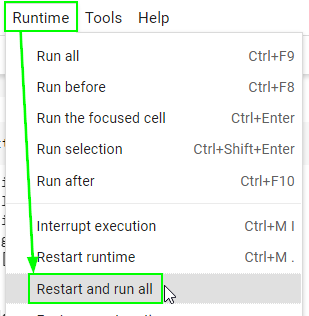

In [ ]:
print('🎯 Restart and run all successful')